In [1]:
import numpy as np
import os
import pandas as pd
import h5py
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from toolbox.utils import set_random_seed
from toolbox.plt_utils import density_scatter

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

In [3]:
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
# for TF To find gpu
os.environ["LD_LIBRARY_PATH"] = f"{os.environ['CONDA_PREFIX']}/lib:" + os.environ.get("LD_LIBRARY_PATH", "")

In [4]:
# set random seed for reproducibility
set_random_seed(seed=42)

2025-12-09 21:14:27.928954: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/valehvpa/miniconda3/envs/hist6/lib:/usr/local/cuda/lib64:/usr/local/cuda/lib64
2025-12-09 21:14:27.928978: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


TensorFlow not installed, skipping tf seeding.


Seed set to 42


# Debug model training

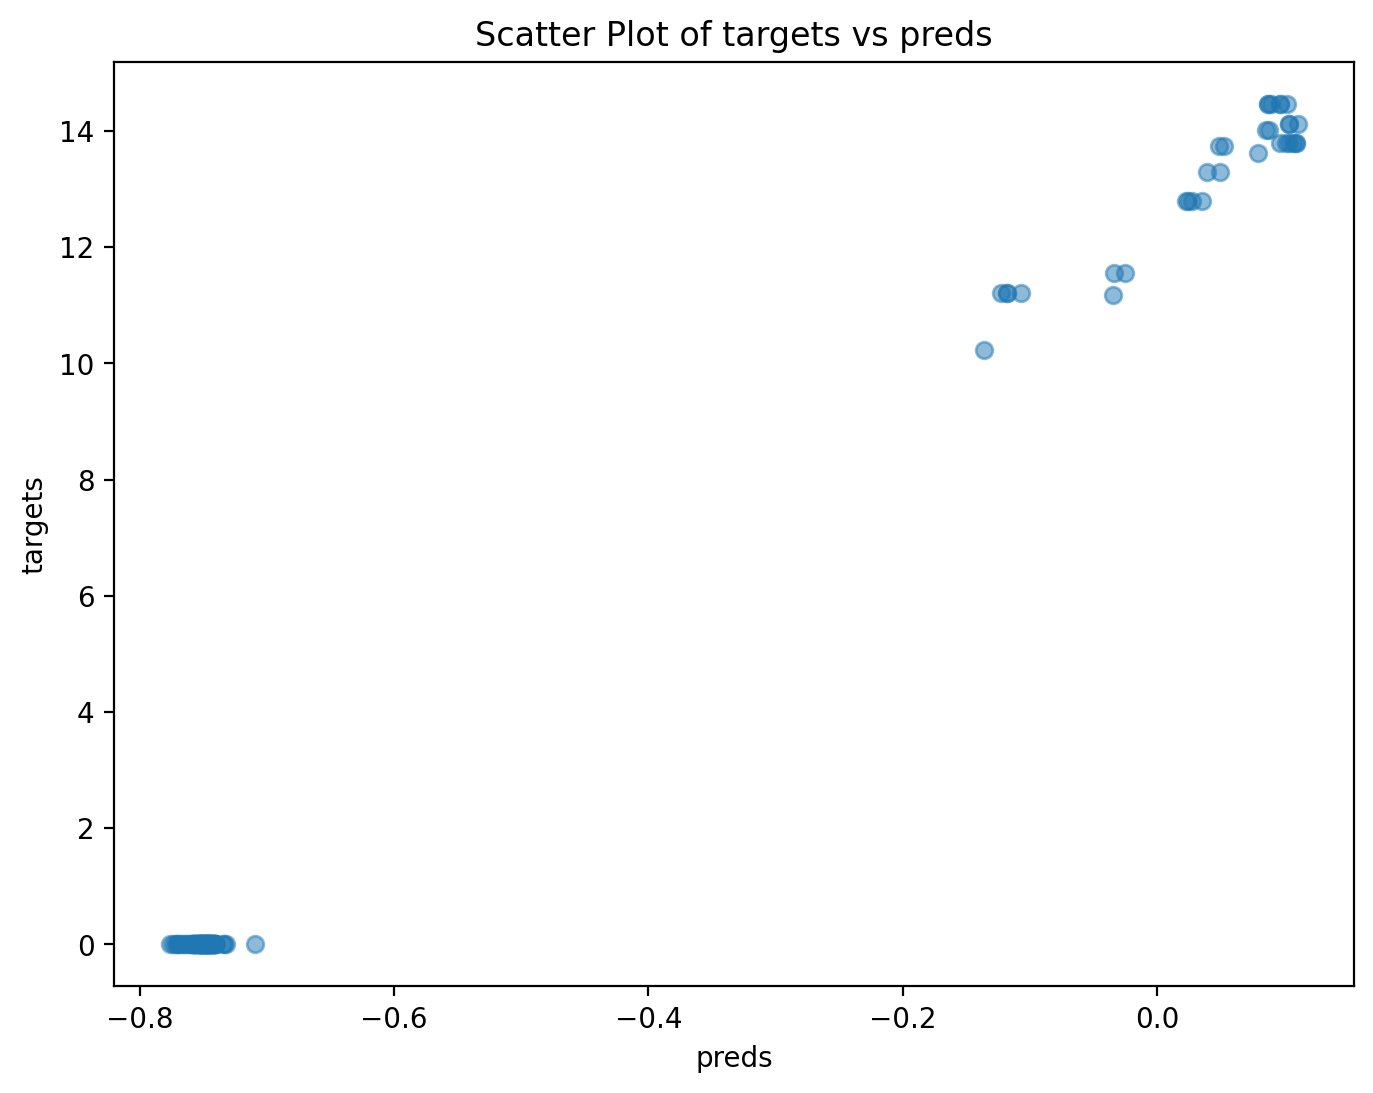

Pearson correlation: 0.99910497899927
Spearman correlation: 0.7729004953637979
mean of x: -0.54019140625
mean of y: 3.50072578125
Covariance: 2.0555638281378172
Standard deviation of x: 0.3513927481348647
Standard deviation of y: 5.8550020168688635


In [ ]:
# x = tensor([-0.7414, -0.7516, -0.7470, -0.7537, -0.7574, -0.1360, -0.7649, -0.7476,
#         -0.7512, -0.7468, -0.7477, -0.7534, -0.7456, -0.7427, -0.7590, -0.7474,
#         -0.7467,  0.0873,  0.0966,  0.0894,  0.0969,  0.0870,  0.1023,  0.0794,
#         -0.7423, -0.7486,  0.0394,  0.0499, -0.7442, -0.7405,  0.1039,  0.1105,
#          0.1040, -0.7339, -0.7346, -0.7509, -0.0339, -0.7497, -0.7445, -0.7480,
#         -0.7461,  0.0856,  0.0882, -0.7453, -0.0343, -0.7530, -0.7564, -0.7476,
#         -0.7417, -0.7546, -0.7565,  0.1070,  0.1093,  0.1095,  0.1035,  0.0966,
#          0.1016, -0.7541, -0.7501, -0.7410, -0.7527,  0.0224,  0.0272,  0.0243,
#          0.0354, -0.0254, -0.7524, -0.7514, -0.7546, -0.7489, -0.7509, -0.7697,
#         -0.7489, -0.7705, -0.7402, -0.1177, -0.1070, -0.7597, -0.7453, -0.1230,
#         -0.1177, -0.7452, -0.7439, -0.7555, -0.7486, -0.7527, -0.7428, -0.7429,
#         -0.7502, -0.7419, -0.7565, -0.7408, -0.7433, -0.7463, -0.7758, -0.7710,
#         -0.7740, -0.7461, -0.7586, -0.7520, -0.7461, -0.7427, -0.7500, -0.7409,
#         -0.7323, -0.7486, -0.7685, -0.7655, -0.7523, -0.7455, -0.7093, -0.7579,
#         -0.7482, -0.7542, -0.7445, -0.7537, -0.7626, -0.7560,  0.0525,  0.0486,
#         -0.7505, -0.7481, -0.7617, -0.7505, -0.7513, -0.7583, -0.7443, -0.7433],
#        device='cuda:0')
# all_targets
# tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 10.2380,  0.0000,  0.0000,
#          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
#          0.0000, 14.4555, 14.4555, 14.4555, 14.4555, 14.4555, 14.4555, 13.6248,
#          0.0000,  0.0000, 13.2942, 13.2942,  0.0000,  0.0000, 14.1254, 14.1254,
#         14.1254,  0.0000,  0.0000,  0.0000, 11.5539,  0.0000,  0.0000,  0.0000,
#          0.0000, 14.0129, 14.0129,  0.0000, 11.1746,  0.0000,  0.0000,  0.0000,
#          0.0000,  0.0000,  0.0000, 13.7943, 13.7943, 13.7943, 13.7943, 13.7943,
#         13.7943,  0.0000,  0.0000,  0.0000,  0.0000, 12.7861, 12.7861, 12.7861,
#         12.7861, 11.5516,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
#          0.0000,  0.0000,  0.0000, 11.2071, 11.2071,  0.0000,  0.0000, 11.2071,
#         11.2071,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
#          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
#          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
#          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
#          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 13.7440, 13.7440,
#          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
#        device='cuda:0')

x = np.array([-0.7414, -0.7516, -0.7470, -0.7537, -0.7574, -0.1360, -0.7649, -0.7476,
        -0.7512, -0.7468, -0.7477, -0.7534, -0.7456, -0.7427, -0.7590, -0.7474,
        -0.7467,  0.0873,  0.0966,  0.0894,  0.0969,  0.0870,  0.1023,  0.0794,
        -0.7423, -0.7486,  0.0394,  0.0499, -0.7442, -0.7405,  0.1039,  0.1105,
        0.1040, -0.7339, -0.7346, -0.7509, -0.0339, -0.7497, -0.7445, -0.7480,
        -0.7461,  0.0856,  0.0882, -0.7453, -0.0343, -0.7530, -0.7564, -0.7476,
        -0.7417, -0.7546, -0.7565,  0.1070,  0.1093,  0.1095,  0.1035,  0.0966,
        0.1016, -0.7541, -0.7501, -0.7410, -0.7527,  0.0224,  0.0272,  0.0243,
        0.0354, -0.0254, -0.7524, -0.7514, -0.7546, -0.7489, -0.7509, -0.7697,
        -0.7489, -0.7705, -0.7402, -0.1177, -0.1070, -0.7597, -0.7453, -0.1230,
        -0.1177, -0.7452, -0.7439, -0.7555, -0.7486, -0.7527, -0.7428, -0.7429,
        -0.7502, -0.7419, -0.7565, -0.7408, -0.7433, -0.7463, -0.7758, -0.7710,
        -0.7740, -0.7461, -0.7586, -0.7520, -0.7461, -0.7427, -0.7500, -0.7409,
        -0.7323, -0.7486, -0.7685, -0.7655, -0.7523, -0.7455, -0.7093, -0.7579,
        -0.7482, -0.7542, -0.7445, -0.7537, -0.7626, -0.7560,  0.0525,  0.0486,
        -0.7505, -0.7481, -0.7617, -0.7505, -0.7513, -0.7583, -0.7443, -0.7433])

y = np.array([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 10.2380,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000, 14.4555, 14.4555, 14.4555, 14.4555, 14.4555, 14.4555, 13.6248,
         0.0000,  0.0000, 13.2942, 13.2942,  0.0000,  0.0000, 14.1254, 14.1254,
        14.1254,  0.0000,  0.0000,  0.0000, 11.5539,  0.0000,  0.0000,  0.0000,
         0.0000, 14.0129, 14.0129,  0.0000, 11.1746,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000, 13.7943, 13.7943, 13.7943, 13.7943, 13.7943,
        13.7943,  0.0000,  0.0000,  0.0000,  0.0000, 12.7861, 12.7861, 12.7861,
        12.7861, 11.5516,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000, 11.2071, 11.2071,  0.0000,  0.0000, 11.2071,
        11.2071,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
        0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
        0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
        0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
        0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 13.7440, 13.7440,
        0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000])

# filter out 0's from y and the correspoinding x entires
mask = y != 0
x = x[mask]
y = y[mask]

# plot the above arrays
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel("preds")
plt.ylabel("targets")
plt.title("Scatter Plot of targets vs preds")
plt.show()

import scipy.stats

# pearsonr
print("Pearson correlation:", np.corrcoef(x, y)[0, 1])
# spearmanr
print("Spearman correlation:", scipy.stats.spearmanr(x, y).correlation)

# x - E[x]
x_centered = x - np.mean(x)
# y - E[y]
y_centered = y - np.mean(y)
# covariance
cov_xy = np.mean(x_centered * y_centered)
# standard deviations
std_x = np.std(x)
std_y = np.std(y)
print("mean of x:", np.mean(x))
print("mean of y:", np.mean(y))
print("Covariance:", cov_xy)
print("Standard deviation of x:", std_x)
print("Standard deviation of y:", std_y)

New

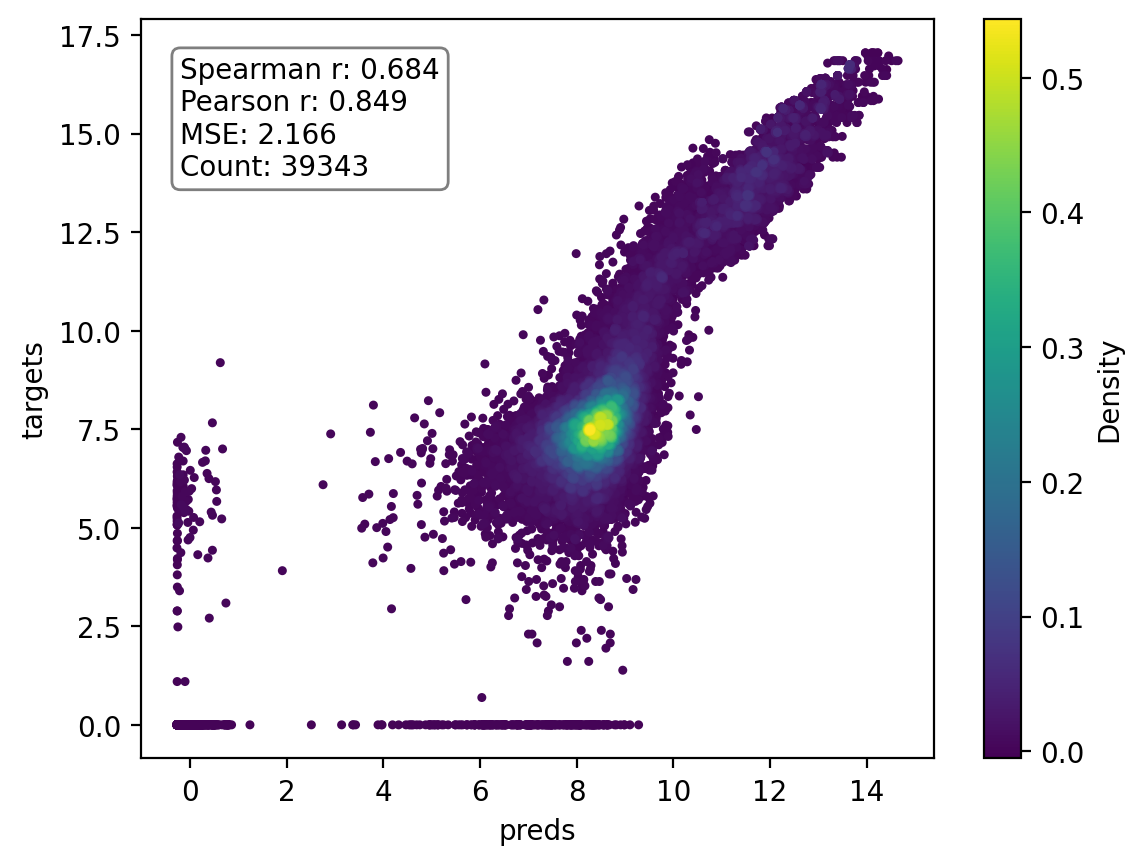

In [10]:
p = "/home/valehvpa/projects/scCisTrans/histobpnet/ap.npy"
ap = np.load(p)

p = "/home/valehvpa/projects/scCisTrans/histobpnet/at.npy"
at = np.load(p)

# scatterplot, ap are predictions, at are targets
# plt.figure(figsize=(8, 6))
# plt.scatter(ap, at, alpha=0.5)
# plt.xlabel("preds")
# plt.ylabel("targets")
# plt.title("Scatter Plot of targets vs preds")
# plt.show()

density_scatter(ap, at, "preds", "targets", s=5, bins=200, incl_stats=True)
# # add a text with: spearmanr, pearsonr, mse, and count
# spearman_corr = scipy.stats.spearmanr(ap, at).correlation
# pearson_corr = scipy.stats.pearsonr(ap, at)[0]
# mse = np.mean((ap - at) ** 2)
# count = ap.shape[0]
# stats_text = f"Spearman r: {spearman_corr:.3f}\nPearson r: {pearson_corr:.3f}\nMSE: {mse:.3f}\nCount: {count}"
# plt.gca().text(0.05, 0.95, stats_text, transform=plt.gca().transAxes,
#                fontsize=10, verticalalignment='top',
#                bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.show()

## correlation analysis

How correlates is activity with accessibltyi? I d expect some correlation since active regions are likely to be open chromatin regions.

Download raw observed atac in gm12878 as well as chrombpent bias corrected predicted atac in gm12878 from encode:

In [6]:
# !wget https://www.encodeproject.org/files/ENCFF180XQC/@@download/ENCFF180XQC.bigWig -O /large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/gm12878_atac_encode/data/ENCFF180XQC.bigWig
# !wget https://www.encodeproject.org/files/ENCFF873JQP/@@download/ENCFF873JQP.bigWig -O /large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/gm12878_atac_encode/data/ENCFF873JQP.bigWig

In [ ]:
p = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_borzoi/histone/peak_scramble/maya_gapped_peaks/gm12878_h3k27ac_peaks.gappedPeak.canonical"
obs_atac = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/gm12878_atac_encode/data/ENCFF180XQC.bigWig"
pred_corr_atac = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/gm12878_atac_encode/data/ENCFF873JQP.bigWig"
chip = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_borzoi/histone/peak_scramble/maya_coverage/all_reps.bw"
inputc = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_borzoi/histone/peak_scramble/maya_coverage/inputc/inputc.bw"

df = pd.read_csv(
    p,
    sep="\t",
    header=None,
    index_col=False,
)
df["length"] = df[2] - df[1]
df.rename(columns={0: 'chrom', 1: 'start', 2: 'end'}, inplace=True)

import pyBigWig
obs_atac_bw = pyBigWig.open(obs_atac)
pred_corr_atac_bw = pyBigWig.open(pred_corr_atac)
chip_bw = pyBigWig.open(chip)
inputc_bw = pyBigWig.open(inputc)

In [6]:
def get_cts(
    peaks_df,
    bw,
    width,
    get_total_cts: bool = False,
):
    vals = []

    for _, r in peaks_df.iterrows():
        # w = r['length'] if width is None else width
        if not get_total_cts:
            vals.append(
                np.nan_to_num(bw.values(r['chrom'],
                                        r['start'],
                                        r['end']))
            )
        else:
            vals.append(np.array([
                np.nansum(bw.values(r['chrom'],
                                    r['start'],
                                    r['end']))
            ]))

    return vals

obs_atac_cts = get_cts(df, obs_atac_bw, None, get_total_cts=True)
pred_corr_atac_cts = get_cts(df, pred_corr_atac_bw, None, get_total_cts=True)
chip_cts = get_cts(df, chip_bw, None, get_total_cts=True)
inputc_cts = get_cts(df, inputc_bw, None, get_total_cts=True)

In [7]:
lfc = []
for o, p in zip(chip_cts, inputc_cts):
    lfc.append(np.log2((o[0] + 1) / (p[0] + 1)))
lfc = np.array(lfc)

obs_atac_cts = [v[0] for v in obs_atac_cts]
pred_corr_atac_cts = [v[0] for v in pred_corr_atac_cts]
obs_atac_cts = np.array(obs_atac_cts).squeeze()
pred_corr_atac_cts = np.array(pred_corr_atac_cts).squeeze()

chip_cts = np.array([v[0] for v in chip_cts]).squeeze()
inputc_cts = np.array([v[0] for v in inputc_cts]).squeeze()

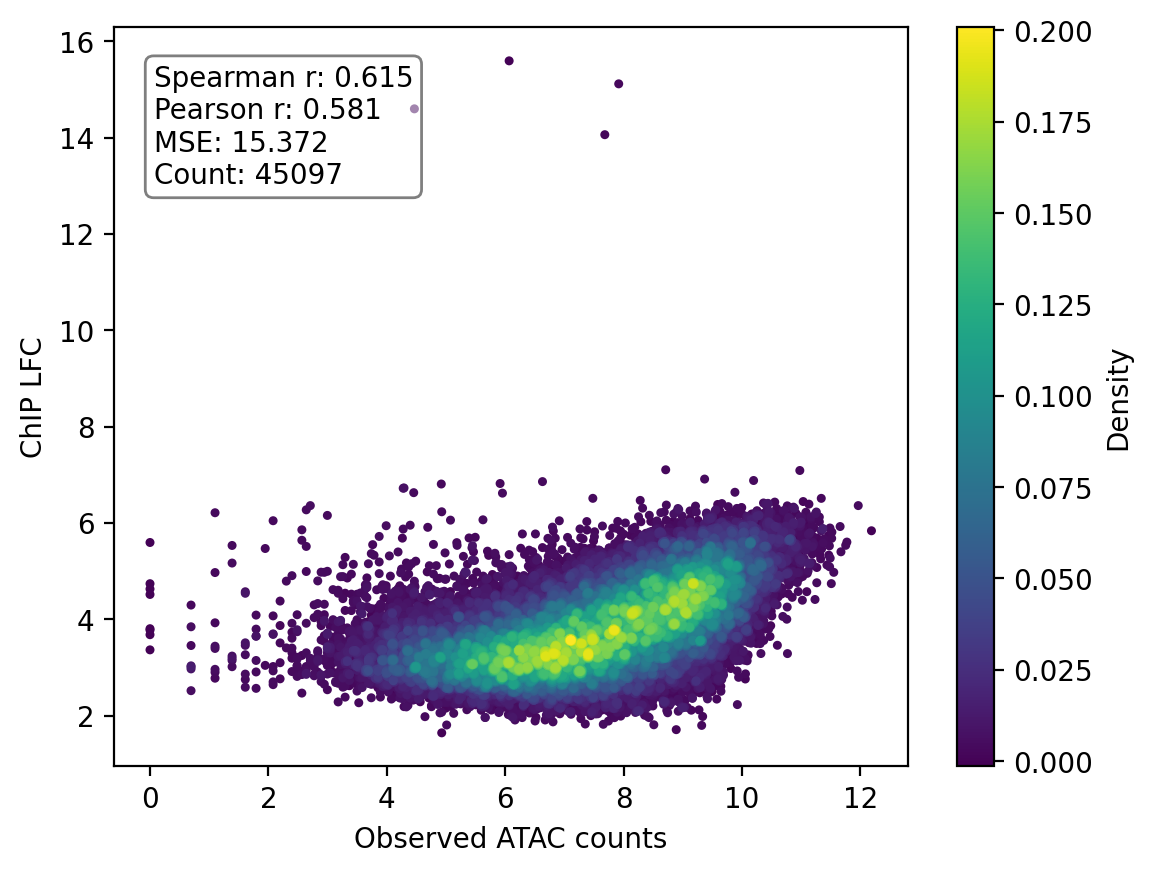

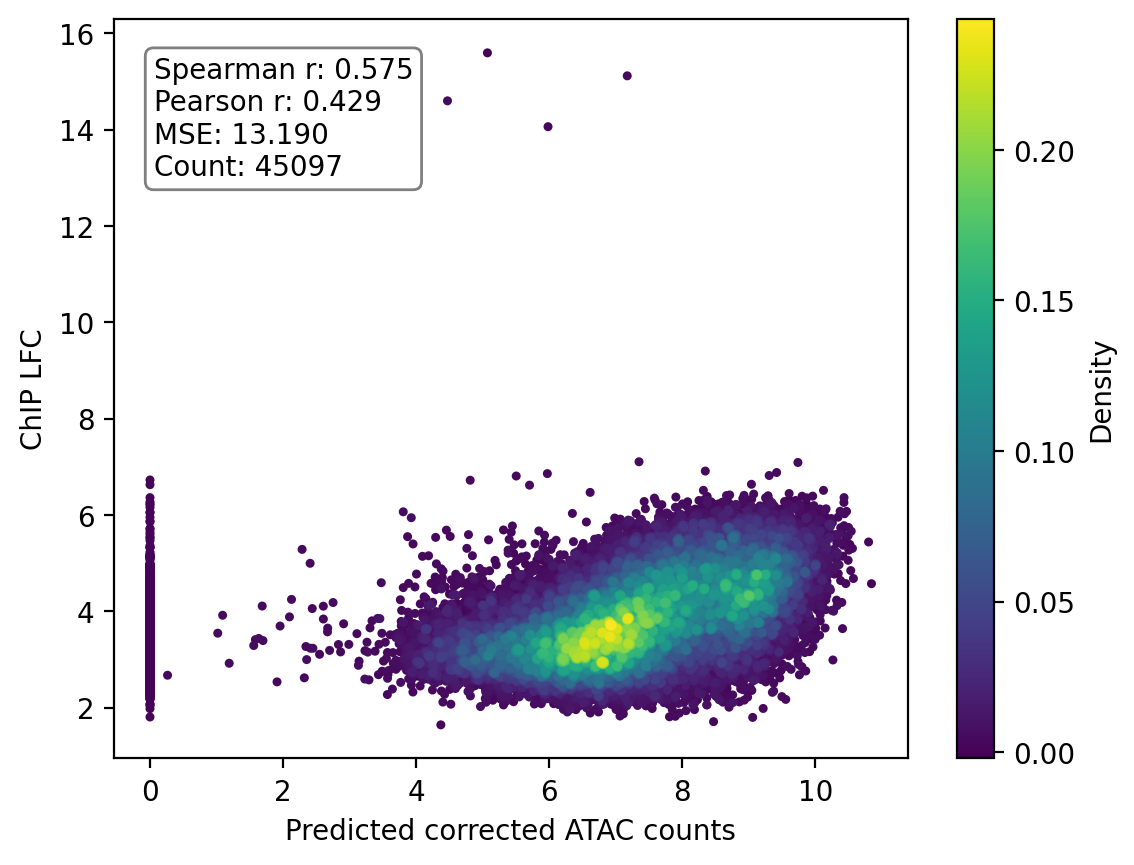

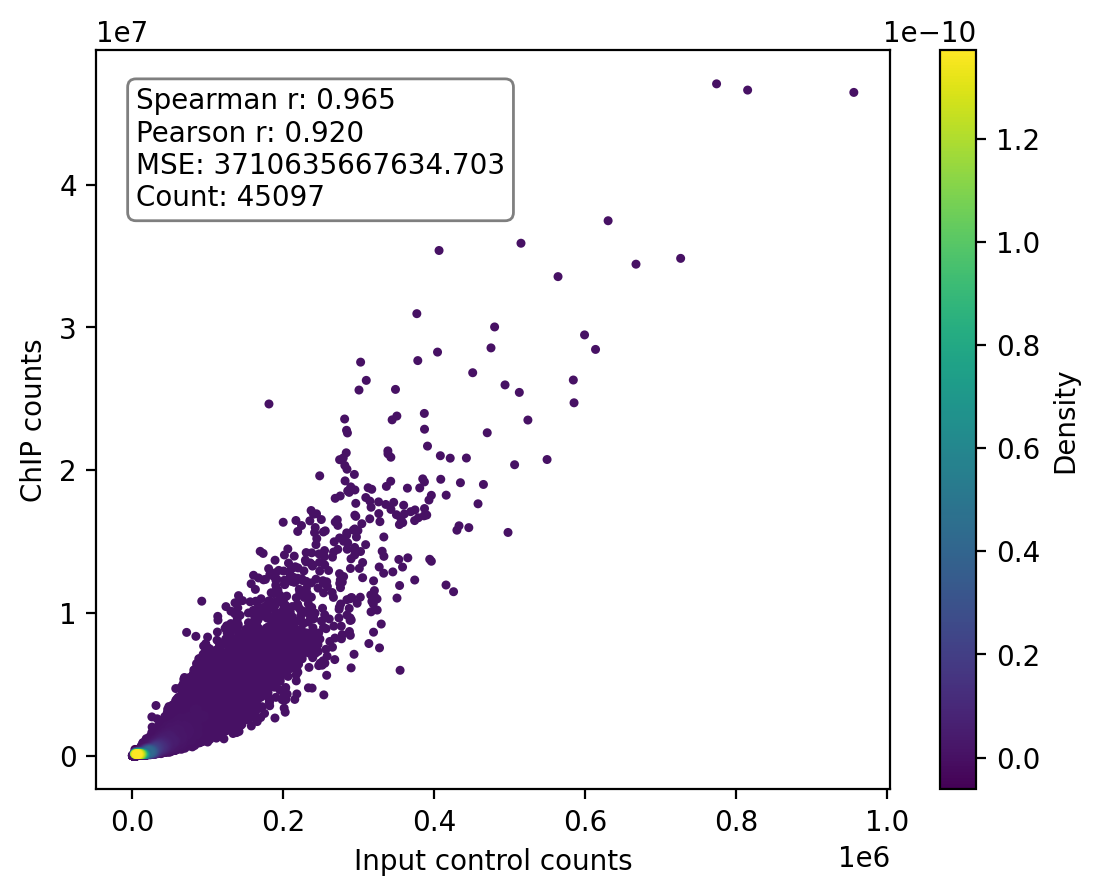

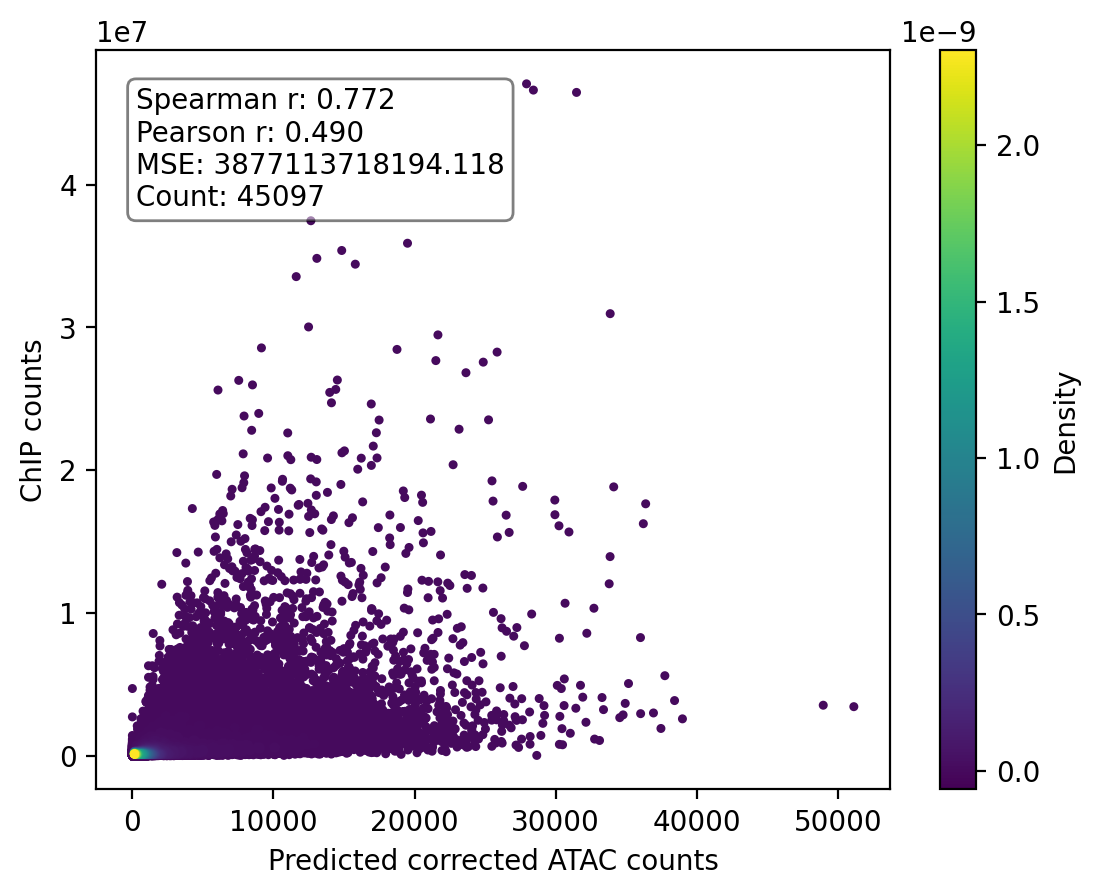

In [8]:
# plot lfc vs obs_atac_cts
density_scatter(np.log1p(obs_atac_cts), lfc, "Observed ATAC counts", "ChIP LFC", s=5, bins=200, incl_stats=True)
plt.show()

# plot lfc vs pred_corr_atac_cts
density_scatter(np.log1p(pred_corr_atac_cts), lfc, "Predicted corrected ATAC counts", "ChIP LFC", s=5, bins=200, incl_stats=True) 
plt.show()

# plot chip_cts vs inputc_cts
density_scatter(inputc_cts, chip_cts, "Input control counts", "ChIP counts", s=5, bins=200, incl_stats=True) 
plt.show()

# plot chip_cts vs pred_corr_atac_cts
density_scatter(pred_corr_atac_cts, chip_cts, "Predicted corrected ATAC counts", "ChIP counts", s=5, bins=200, incl_stats=True) 
plt.show()

Yet to conclude something...

Meanwhil... why are there zoers in chip_cts? these are histone gapped peaks after all..

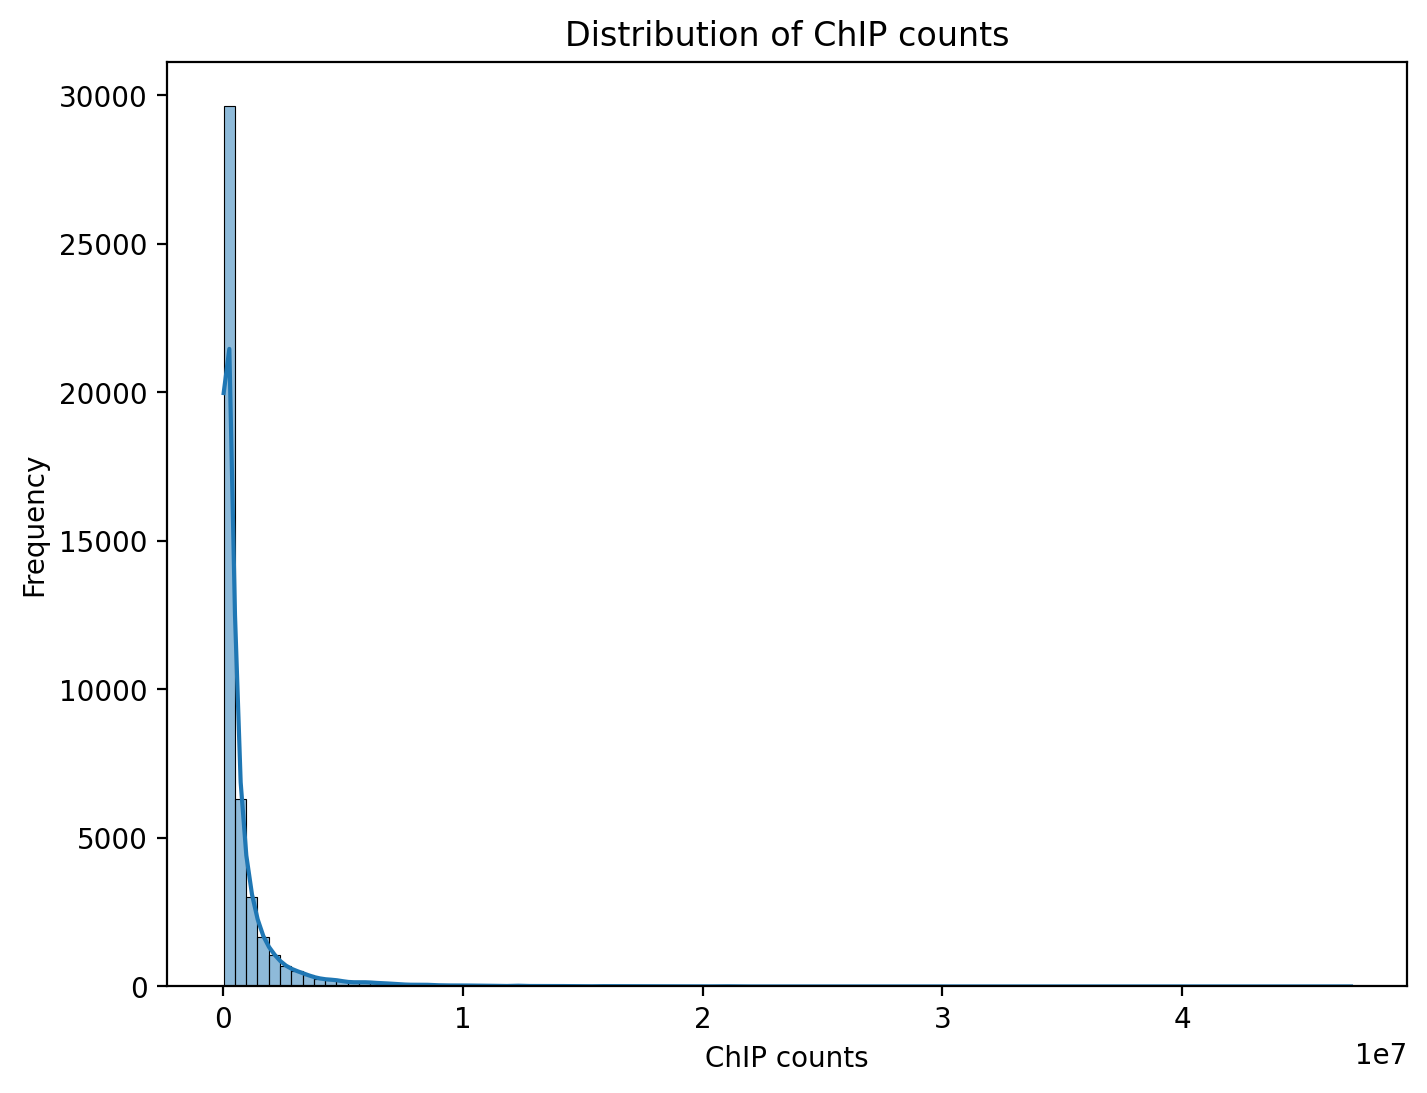

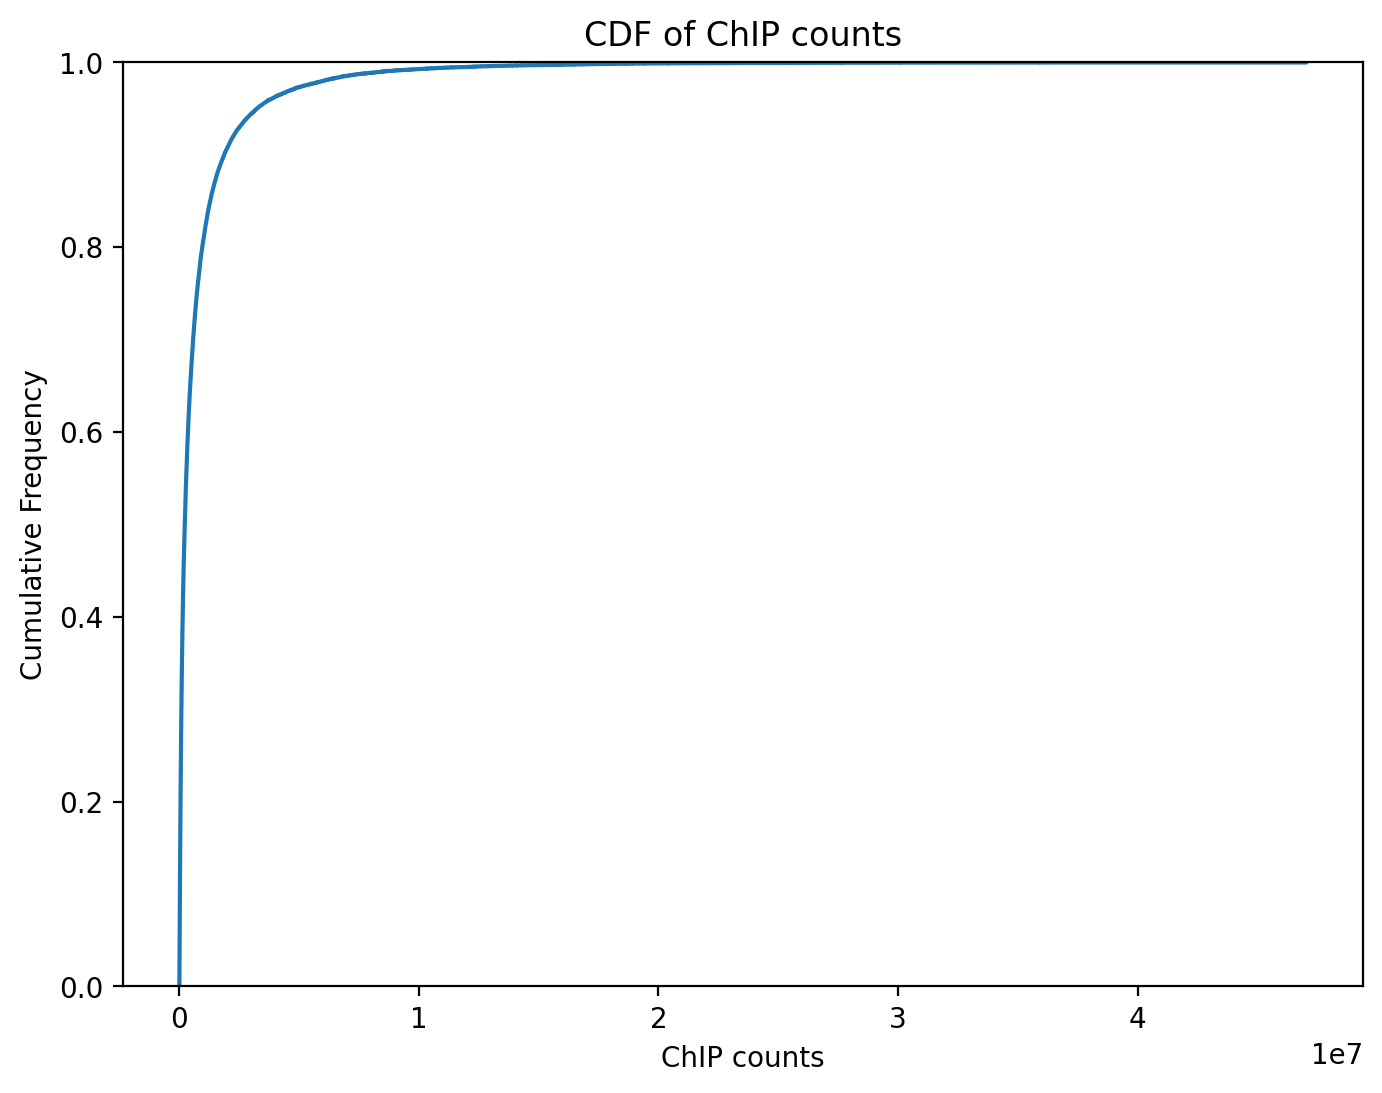

In [20]:
# plot distirubiton of chip_cts
plt.figure(figsize=(8, 6))
sns.histplot(chip_cts, bins=100, kde=True)
plt.xlabel("ChIP counts")
plt.ylabel("Frequency")
plt.title("Distribution of ChIP counts")
plt.show()

# plot cdf
plt.figure(figsize=(8, 6))
sns.ecdfplot(chip_cts)
plt.xlabel("ChIP counts")
plt.ylabel("Cumulative Frequency")
plt.title("CDF of ChIP counts")
plt.show()

In [14]:
pd.Series(chip_cts).describe()

count    4.509700e+04
mean     7.909079e+05
std      1.806506e+06
min      8.645000e+03
25%      7.619400e+04
50%      2.375760e+05
75%      7.427610e+05
max      4.705247e+07
dtype: float64

That's a pretty huge variance... What if we plot after filtering out what s above the 95th percentile? the 99th percentile?..

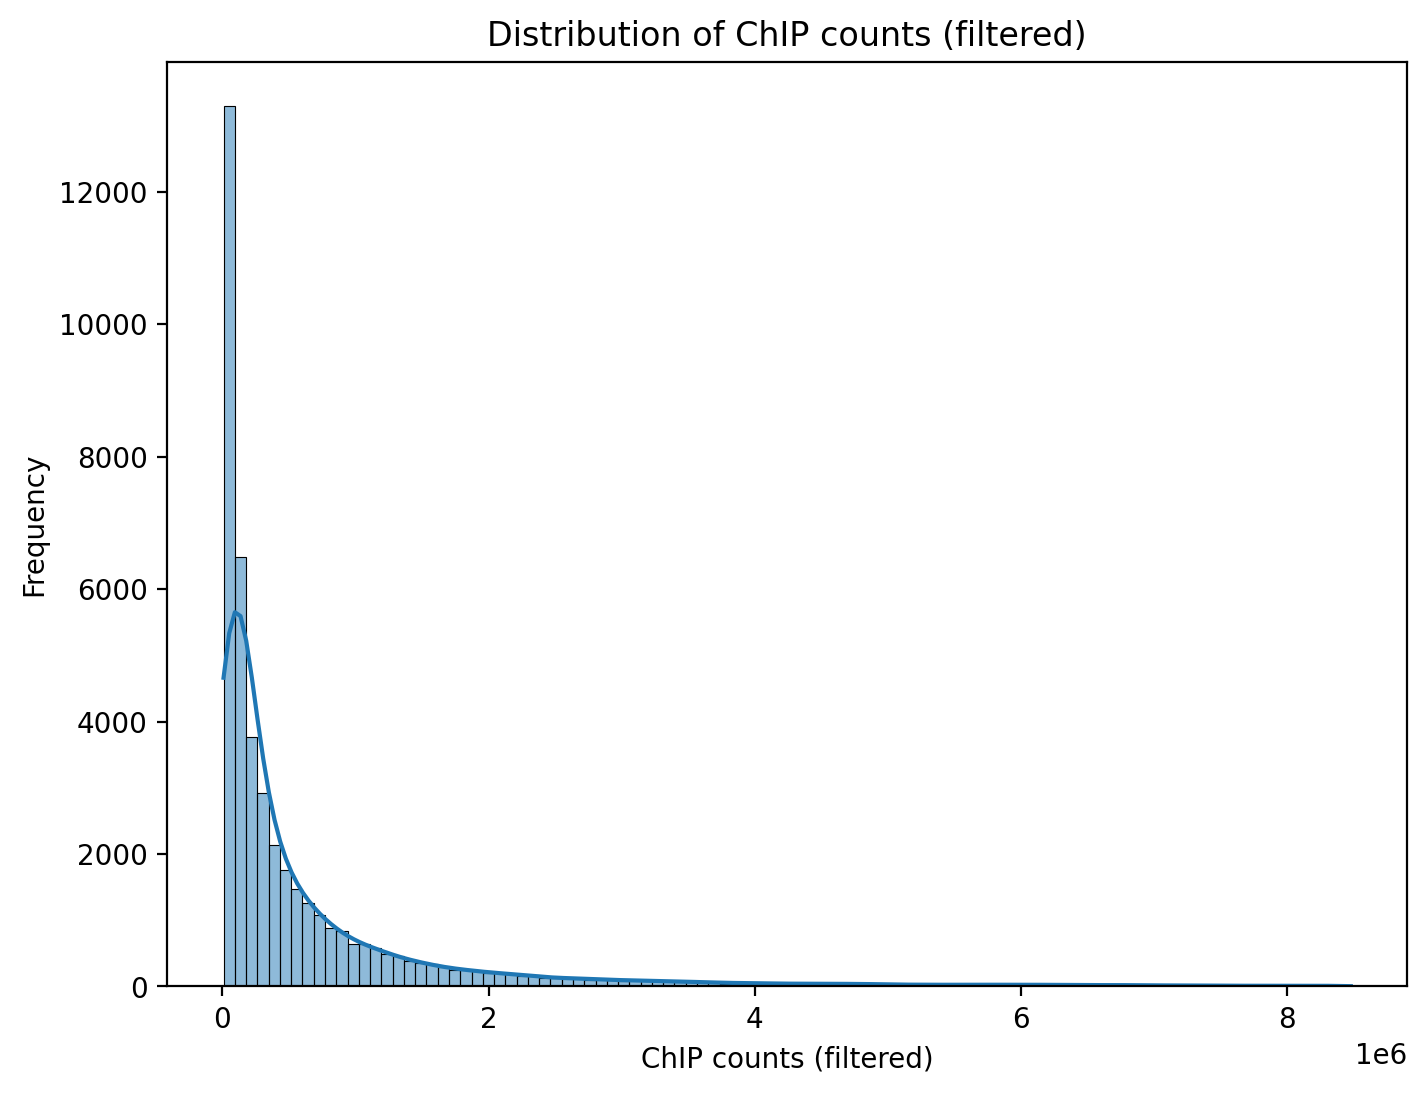

In [21]:
# filter out values above the 99th percentile
p99 = np.percentile(chip_cts, 99)
chip_cts_filtered = chip_cts[chip_cts <= p99]
# plot distirubiton of filtered chip_cts
plt.figure(figsize=(8, 6))
sns.histplot(chip_cts_filtered, bins=100, kde=True)
plt.xlabel("ChIP counts (filtered)")
plt.ylabel("Frequency")
plt.title("Distribution of ChIP counts (filtered)")
plt.show()

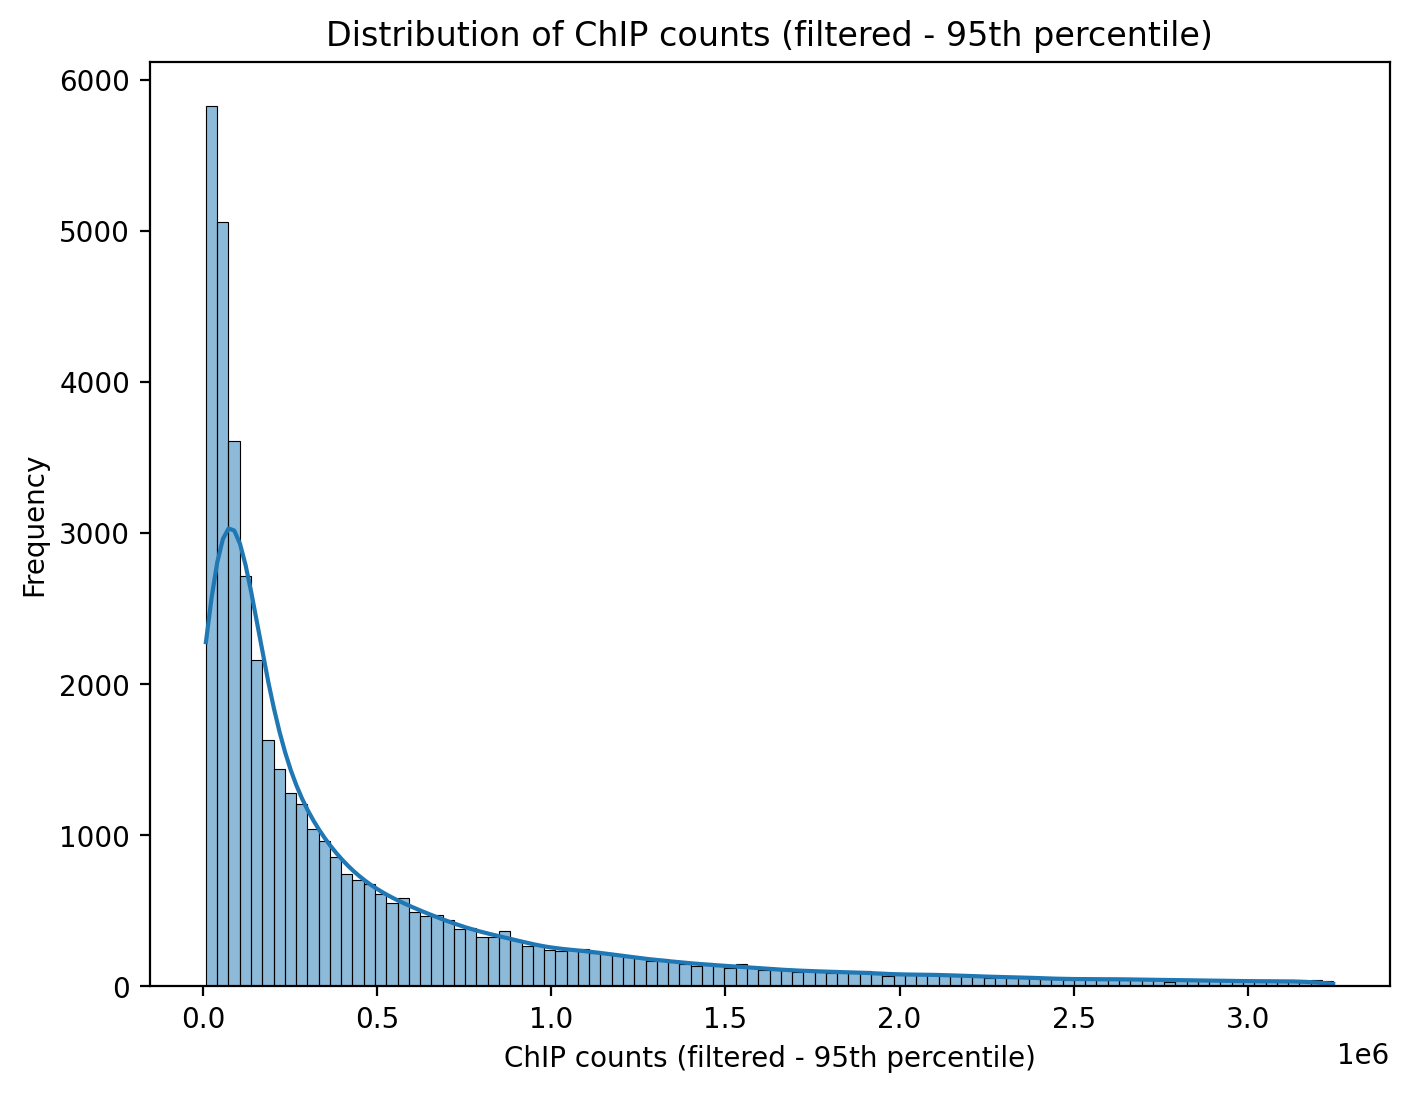

In [22]:
# filter out values above the 99th percentile
p95 = np.percentile(chip_cts, 95)
chip_cts_filtered = chip_cts[chip_cts <= p95]
# plot distirubiton of filtered chip_cts
plt.figure(figsize=(8, 6))
sns.histplot(chip_cts_filtered, bins=100, kde=True)
plt.xlabel("ChIP counts (filtered - 95th percentile)")
plt.ylabel("Frequency")
plt.title("Distribution of ChIP counts (filtered - 95th percentile)")
plt.show()

also how does it look for atac peaks? I mean: what is the distribution of observed atac counts in atac peaks?

In [23]:
p = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/gm12878_atac_encode/chrombpnet_data/peaks.all_input_regions.ENCSR868FGK.bed.gz"
atac_peaks_df = pd.read_csv(
    p,
    sep="\t",
    header=None,
    index_col=False,
    compression="gzip",
)
atac_peaks_df.rename(columns={0: 'chr', 1: 'start', 2: 'end', 3: 'name', 9: 'summit'}, inplace=True)

In [26]:
def get_cts_for_atac(
    peaks_df,
    bw,
    width,
    get_total_cts: bool = False,
):
    vals = []
    for _, r in peaks_df.iterrows():
        if not get_total_cts:
            vals.append(
                np.nan_to_num(bw.values(r['chr'],
                                        r['start'] + r['summit'] - width//2,
                                        r['start'] + r['summit'] + width//2))
            )
        else:
            vals.append(np.array([
                np.nansum(bw.values(r['chr'],
                                    r['start'] + r['summit'] - width//2,
                                    r['start'] + r['summit'] + width//2))
            ]))

    return np.array(vals)

atac_counts = get_cts_for_atac(
    atac_peaks_df,
    obs_atac_bw,
    1000,
    get_total_cts=True,
)

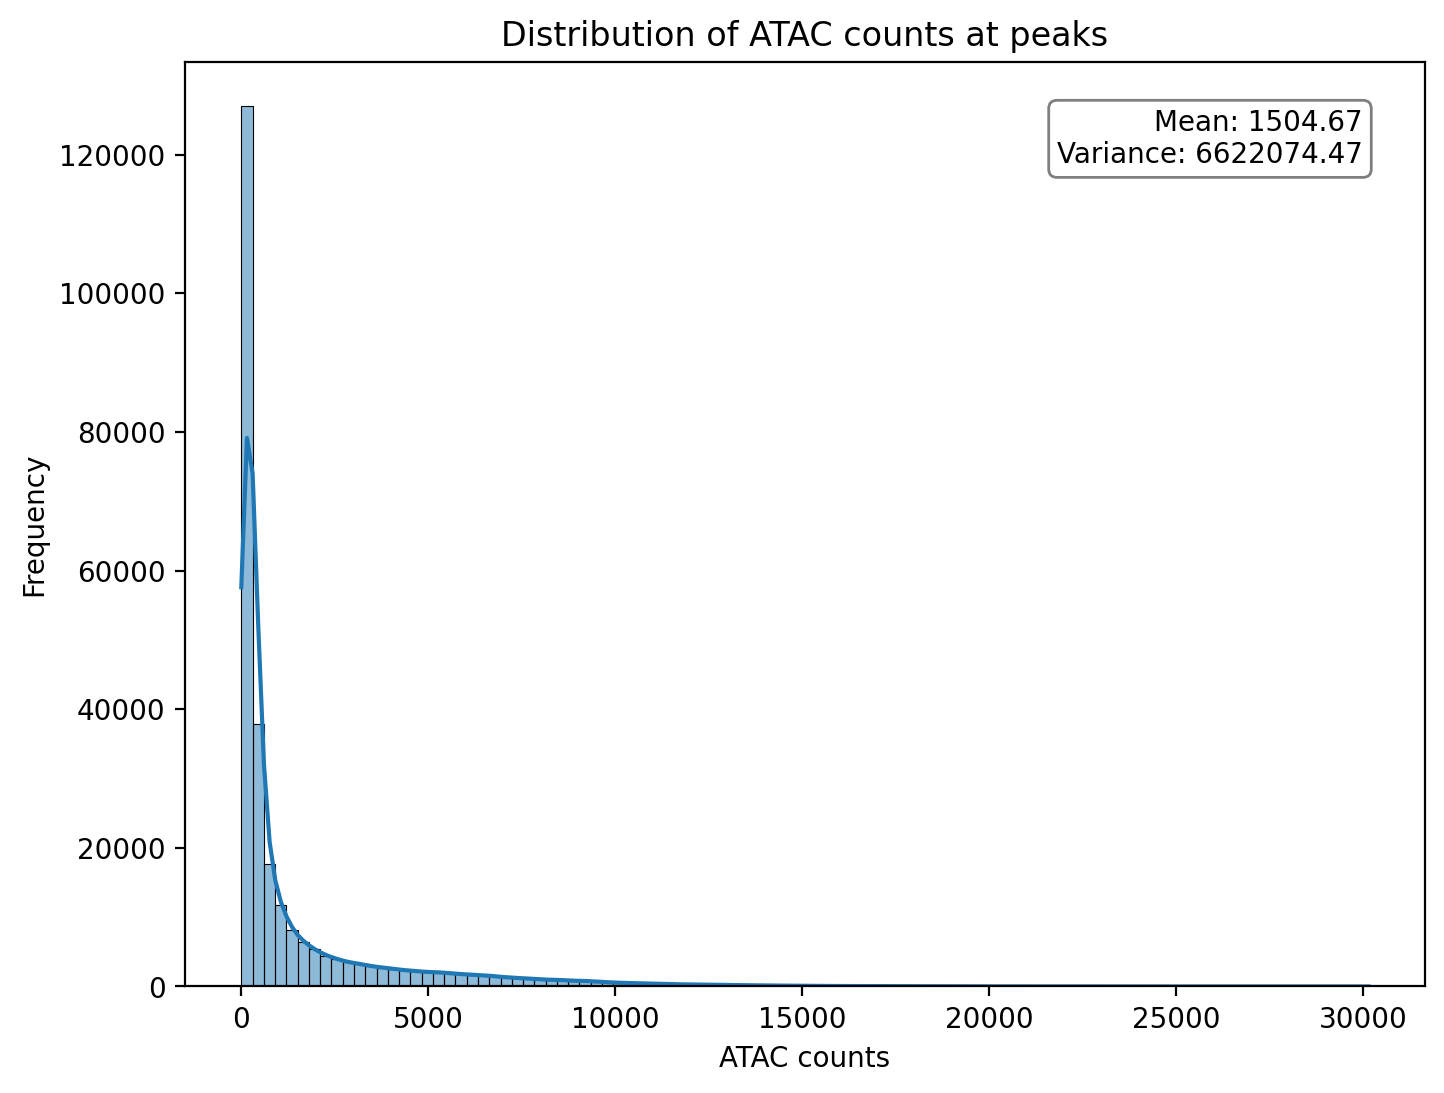

In [28]:
# plot the distribution of atac_counts
plt.figure(figsize=(8, 6))
sns.histplot(atac_counts.squeeze(), bins=100, kde=True)
plt.xlabel("ATAC counts")
plt.ylabel("Frequency")
# add a text with mean and variance
mean_atac = np.mean(atac_counts)
var_atac = np.var(atac_counts)
stats_text = f"Mean: {mean_atac:.2f}\nVariance: {var_atac:.2f}"
plt.gca().text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
               fontsize=10, verticalalignment='top',
               horizontalalignment='right',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.title("Distribution of ATAC counts at peaks")
plt.show()

In [30]:
pd.Series(np.log1p(chip_cts)).describe()

count    45097.000000
mean        12.421735
std          1.519726
min          9.064852
25%         11.241051
50%         12.378247
75%         13.518131
max         17.666774
dtype: float64

In [33]:
p = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/histobpnet_v2/train/instance-20251208_145623/predict/test/regions.csv"
regions_df = pd.read_csv(
    p,
    sep="\t",
    header=0,
    index_col=False,
)
regions_df["true_count"].describe()

count    81209.000000
mean        10.340846
std          2.903291
min          0.000000
25%          8.872207
50%          9.448648
75%         10.869539
max         19.266888
Name: true_count, dtype: float64

That s weird that there are zeros here ^ ...
Need to debug the code..

In [38]:
p = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/histobpnet_v2/data/reverse_extended_gapped_peak_histone_intersect_2114bp_atac_for_train.bed"
atac_hgp_df = pd.read_csv(
    p,
    sep="\t",
    header=0,
    index_col=False,
)

def center_region_around_summit(df, width):
    df.loc[:, 'start'] = df.loc[:, 'start'].astype(np.int64) + df.loc[:, 'summit'] - width // 2
    df.loc[:, 'end'] = df.loc[:, 'start'] + width 
    df.loc[:, 'summit'] = width // 2
    return df

def add_peak_id(df, chr_key: str = "chr", start_key: str = "start", end_key: str = "end", inplace: bool = True):
    if inplace:
        df["peak_id"] = df[chr_key].astype(str) + ":" + df[start_key].astype(str) + "-" + df[end_key].astype(str)
    else:
        df_copy = df.copy()
        df_copy["peak_id"] = df_copy[chr_key].astype(str) + ":" + df_copy[start_key].astype(str) + "-" + df_copy[end_key].astype(str)
        return df_copy
    
atac_peaks_df = center_region_around_summit(atac_peaks_df, 2114)
add_peak_id(atac_peaks_df)

In [43]:
def get_cts_from_atac_hgp_df(
    peaks_df,
    bw,
    atac_hgp_df=None,
    skip_missing_hist: bool = False,
    ctrl_scaling_factor: float = 1.0,
):
    vals = []

    u = (atac_hgp_df["end"] - atac_hgp_df["start"]).unique()
    assert u.shape[0] == 1, "All ATAC-Histone mapping regions must have the same length."
    peak_len_a = u[0]
    u2 = (peaks_df["end"] - peaks_df["start"]).unique()
    assert u2.shape[0] == 1, "All ATAC peaks must have the same length."
    peak_len_b = u2[0]
    assert peak_len_a == peak_len_b, "ATAC-Histone mapping regions must have the same length as ATAC peaks."

    merged = peaks_df.merge(
        atac_hgp_df[["peak_id", "hist_chrom", "hist_start", "hist_end"]],
        on="peak_id",
        how="left"
    )
    if len(merged) != len(peaks_df):
        raise ValueError("Some peaks in peaks_df have multiple matches in atac_hgp_df based on peak_id.")
    for _, r in merged.iterrows():
        if pd.isna(r['hist_chrom']):
            raise ValueError(f"No matching ATAC-Histone mapping found for region: {r['chr']}:{r['start']}-{r['end']}")
        elif r.hist_chrom == '.':
            # assert not skip_missing_hist, "skip_missing_hist is True but found missing histone peak."
            # vals.append(np.array([0]))
            continue
        else:
            vals.append(np.array([
                ctrl_scaling_factor * np.nansum(bw.values(r.hist_chrom, r.hist_start, r.hist_end))
            ]))

    return np.array(vals)

add_peak_id(atac_hgp_df, chr_key="chrom")
vals = get_cts_from_atac_hgp_df(
    atac_peaks_df,
    chip_bw,
    atac_hgp_df=atac_hgp_df,
    skip_missing_hist=True,
    ctrl_scaling_factor=1.0,
)

In [50]:
# pd.Series(vals.squeeze()).describe()
pd.Series(np.log1p(vals.squeeze())).describe()

count    63771.000000
mean        13.692901
std          1.293370
min          9.122383
25%         12.882951
50%         13.709838
75%         14.524090
max         17.666774
dtype: float64

Now I really dont udnerstand why the density plots on wandb show 0 labels (0 for Log Count Labels, that is)

In [ ]:
regions_df_peaks = regions_df[regions_df['is_peak'] == True].copy()

In [54]:
regions_df_peaks["true_count"].describe()

count    14735.000000
mean        15.343145
std          1.326125
min         10.967180
25%         14.512675
50%         15.365153
75%         16.193558
max         19.266888
Name: true_count, dtype: float64

Ok I stepped through the code and didnt see any zeros... my conclusion so far is that it could have been caused by teh data caching I was doing. I stopped caching and that might be what fixed it.

# why are there so many high valyes in GC matched negatgives?

for example see train scatter plots herE: https://wandb.ai/valehamiri/histobpnet/runs/iqsb4196?nw=nwuservalehamiri

For each gc matched negative (ATAC peak), does it overlap any ... to be continued...

# Are you finetuning for real?

In [7]:
import h5py
p = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/gm12878_atac_encode/chrombpnet_pretrained/fold_0/model.chrombpnet_nobias.fold_0.ENCSR637XSC.h5"
# read weights from h5 file
with h5py.File(p, 'r') as f:
    # print keys
    # print(list(f["model_weights"]["wo_bias_bpnet_1conv"]["wo_bias_bpnet_1conv"].keys()))
    a = f["model_weights"]["wo_bias_bpnet_1st_conv"]["wo_bias_bpnet_1st_conv"]["kernel:0"][:]

In [ ]:
# ['add', 'add_1', 'add_2', 'add_3', 'add_4', 'add_5', 'add_6', 'add_7', 'gap', 'sequence', 'wo_bias_bpnet_1conv', 'wo_bias_bpnet_1crop', 'wo_bias_bpnet_1st_conv', 'wo_bias_bpnet_2conv', 'wo_bias_bpnet_2crop', 'wo_bias_bpnet_3conv', 'wo_bias_bpnet_3crop', 'wo_bias_bpnet_4conv', 'wo_bias_bpnet_4crop', 'wo_bias_bpnet_5conv', 'wo_bias_bpnet_5crop', 'wo_bias_bpnet_6conv', 'wo_bias_bpnet_6crop', 'wo_bias_bpnet_7conv', 'wo_bias_bpnet_7crop', 'wo_bias_bpnet_8conv', 'wo_bias_bpnet_8crop', 'wo_bias_bpnet_logcount_predictions', 'wo_bias_bpnet_logits_profile_predictions', 'wo_bias_bpnet_logitt_before_flatten', 'wo_bias_bpnet_prof_out_precrop']

In [ ]:
# 'wo_bias_bpnet_1conv', 'wo_bias_bpnet_1crop', 'wo_bias_bpnet_1st_conv', 'wo_bias_bpnet_2conv', 'wo_bias_bpnet_2crop', 'wo_bias_bpnet_3conv', 'wo_bias_bpnet_3crop', 'wo_bias_bpnet_4conv', 'wo_bias_bpnet_4crop', 'wo_bias_bpnet_5conv', 'wo_bias_bpnet_5crop', 'wo_bias_bpnet_6conv', 'wo_bias_bpnet_6crop', 'wo_bias_bpnet_7conv', 'wo_bias_bpnet_7crop', 'wo_bias_bpnet_8conv', 'wo_bias_bpnet_8crop', 'wo_bias_bpnet_logcount_predictions', 'wo_bias_bpnet_logits_profile_predictions', 'wo_bias_bpnet_logitt_before_flatten', 'wo_bias_bpnet_prof_out_precrop']

I saved this before the call to trainer.fit() so the model was just initialized/loaded. And this is how this was saved:

```python
import torch
import h5py
def save_model_to_h5(model, filename):
    state = model.state_dict()
    with h5py.File(filename, "w") as f:
        for key, tensor in state.items():
            # convert to numpy and save
            f.create_dataset(key, data=tensor.cpu().numpy())
filename = "fff.h5"
save_model_to_h5(model_wrapper.model, filename)
```

In [ ]:
import h5py
p = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/histobpnet_v2/misc/hv2_weights.h5"
with h5py.File(p, 'r') as f:
    b = f["bpnet.iconv.weight"][:]

In [14]:
# b.shape, a.shape
a = a.transpose(2, 1, 0)
import numpy as np
np.allclose(a, b)

True

Good. Alrigth Im not chedcking for all the other weights

# How many examples does chromboent see during training?

In [15]:
!zcat /large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/gm12878_atac_encode/chrombpnet_data/fold_0/nonpeaks.trainingset.fold_0.ENCSR868FGK.bed.gz | wc -l

2890.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


183162


In [17]:
!zcat /large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/gm12878_atac_encode/chrombpnet_data/fold_0/peaks.trainingset.fold_0.ENCSR868FGK.bed.gz | wc -l

2908.63s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


183494


(btw pretty sure this is subampled 10:1 (10 positives for 1 negtive) for each mini batch thouhg)

Ok so mine is like peanuts :D 
https://wandb.ai/valehamiri/histobpnet/runs/uo7rvz8r?nw=nwuservalehamiri

n peaks: 44915